# Lab 2: One Pole Lowpass Filter

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio # We only need the Audio 'Class' from this package
from IPython.display import Image

## PART 1 - One Pole Lowpass with decay input

In [58]:
def lowpass_decay(x, d):
    '''Apply a one-pole lowpass filter to a signal. Cutoff set by decay parameter

    Parameters
    ----------
    x : of type np.ndarray:
        The input signal as an array

        *Important*: The audio should NOT be read inside the function.
                     An array containing the audio should be the input instead.

    d : float: 0 < d < 1
         The decay factor of the lowpass filter

    Returns
    -------
    y : of type np.ndarray
        The low-passed signal in the form of an array
    '''
    # Write your code below this line
    
    lp_arr = []
    i = 0
    while i < x.size:
        if i == 0:
            lp_arr.append(x[0])
        else:
            lp_arr.append(d * x[i] + (1 - d) * lp_arr[i-1])
        i+=1
        
    y = np.array(lp_arr)
    
    return y

### Test your lowpass filter

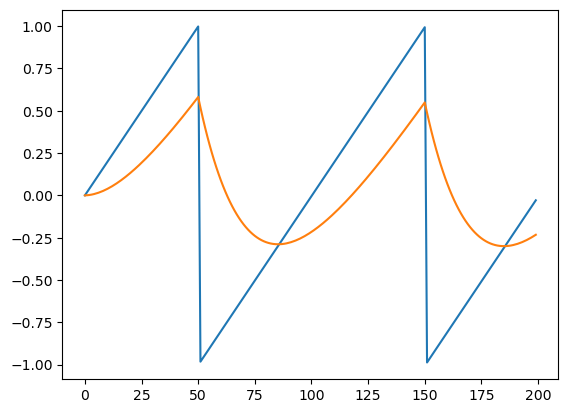

In [85]:
x, srate = sf.read('sawtooth.wav')

# ------ NORMALIZE x here ------

abs_arr = np.absolute(x)
abs_max = abs_arr.max()
x = x / abs_max

lp = lowpass_decay(x,.04) # applies your lowpass function, TEST WITH DIFFERENT VALUE OF d

plt.plot(x[:200]) # plots the first 200 samples of 'sawtooth.wav'
plt.plot(lp[:200]) # plots the first 200 samples of your filtered sawtooth wave

Audio(lp, rate = srate) # plays the filtered sawtooth wave

## PART 2 - Apply the  lowpass filter to your own audio file below

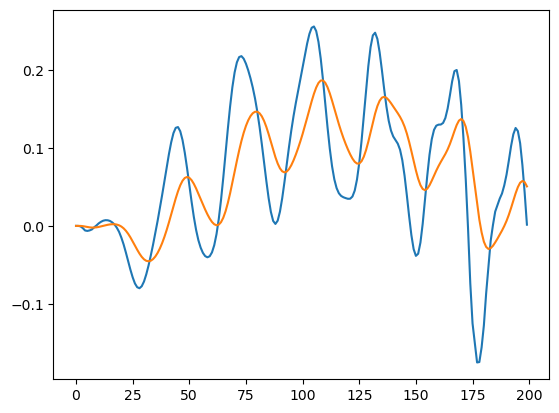

In [80]:
z, srate2 = sf.read('tone_mono.wav')

abs_array = np.absolute(x)
absol_max = abs_array.max()
z = z / absol_max

my_lp = lowpass_decay(z, .1)
plt.plot(z[:200]) 
plt.plot(my_lp[:200])
Audio(my_lp, rate = srate2)

#### Question 2a: 
Discuss the effects of different decay values on the sound 

As the decay level gets lower, the cutoff frequency of the filter is effectively lowered, filtering out higher frequency overtones. Along with this diminution of upper frequency content, the amplitude of the signal is also lowered, and its phase gets shifted to the right. Higher D values result in greater phase shifts to the right, and greater amplitude reduction. In looking at the waveforms over the course of several d-value shifts, one can tell that the valleys of the waveform are smoothed, with the waveform ultimately approaching 0 amplitude as the d value gets closer to 0. 

## PART 3 - One Pole Lowpass with cutoff frequency input

In [86]:
def lowpass_freq(x, srate, fc):

    '''Apply a one-pole lowpass filter to a signal. Cutoff set by frequency parameter

    Parameters
    ----------
    x : of type np.ndarray:
        The input signal as an array

        *Important*: The audio should NOT be read inside the function.
                     An array containing the audio should be the input instead.

    srate : of type int
        Sample rate of input signal in Hz

    fc: of type int
        Desired cutoff frequency of lowpass filter

    Returns
    -------
    y : of type np.ndarray
        The low-passed signal in the form of an array
    '''
    # Write your code below this line
    d = (2 * np.pi * (1/srate) * fc) / (2 * np.pi * (1/srate) * fc + 1)
    lp_arr = []
    i = 0
    while i < x.size:
        if i == 0:
            lp_arr.append(x[0])
        else:
            lp_arr.append(d * x[i] + (1 - d) * lp_arr[i-1])
        i+=1
        
    y = np.array(lp_arr)

    return y

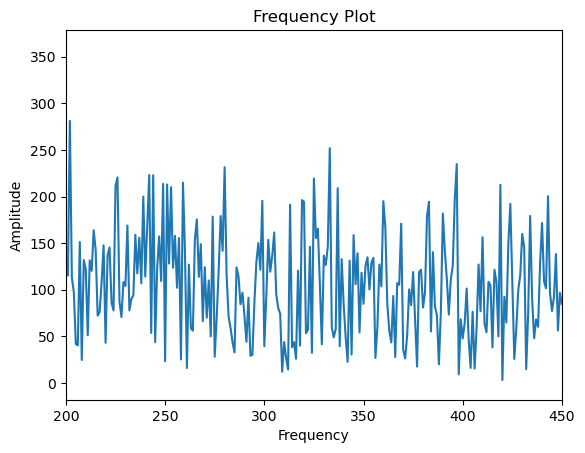

In [87]:
# White noise
wht_x, wht_srate = sf.read('whitenoise.wav')

lpf = lowpass_freq(wht_x, wht_srate, 300) # applies lowpass filter to white noise signal, TEST WITH DIFFERENT fc




# Analyzes fequencies in output using a Fast Fourier Transform (we will learn about this technique soon!)
plt.plot(np.abs(np.fft.fft(lpf)))
plt.xlim([200,450])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Plot')

Audio(lpf, rate = wht_srate)

#### Question 3a:
Describe the effect of the filter on frequencies above and below the cutoff frequency. Does the filter perfectly cut off frequencies above it and perfectly preserve frequencies below it?

The filter neither perfectly cuts off frequencies above it, nor perfectly preserves those below it. By plugging in various frequency cutoff values, one can tell that frequencies over the cutoff value are attenuated but not eliminated entirely. Similarly, when one looks at the behavior of frequencies below the cutoff value as that value is changed, you can view slight variations in amplitude, possibly as a result of phase alterations produced by the filter.

#### Question 3b:
By inspecting the graph, approximate the dB/octave cutoff slope of the filter. Compare two points separated by an octave (a doubling of frequency) on the graph using the decibel formula: (YOU MUST SHOW YOUR CALCULATIONS TO RECIEVE CREDIT)

    - dB = 20 * log(v1/v0)
    
    Note: If you are having trouble finding two points with stable values, experiment with different values for cutoff frequency, or modify the xlim() of the graph to zoom into a section.
    
cutoff at 300hz, amplitude at 200hz: ~115, amplitude at 400hz: ~50
20 * log(50 / 115) = -7.23
The db/octave reduction for the cutoff slope of this filter is roughly 7.23, or 7.23 dB of reduction per octave. 

## Extended Assignment (OPTIONAL, not extra credit, just for fun!) - One pole, one zero highpass filter

In [ ]:
def highpass(x, p):
    '''Apply a one pole, one zero high pass filter to a signal. Cutoff set p input

    Parameters
    ----------
    x : of type np.ndarray:
        The input signal as an array

        *Important*: The audio should NOT be read inside the function.
                     An array containing the audio should be the input instead.


    p: of type float
        Value between zero and one, determines cutoff frequency of filter

    Returns
    -------
    y : of type np.ndarray
        The high-passed signal in the form of an array
    '''
    return y

In [ ]:
# White noise
wht_x, wht_srate = sf.read('whitenoise.wav')

hpf = highpass(wht_x, 0.5)
#FFT
plt.plot(np.abs(np.fft.fft(hpf)))
plt.xlim([0,20000])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Plot')

Audio(hpf, rate = wht_srate)